<a href="https://colab.research.google.com/github/nagamouni/Capstone_project_ridge_lasso/blob/main/Hamoye_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Women's International Football Results**

### **Problem Statement**


*   Train a machine learning model to predict the results of Women's International Football across different teams based on home advantage



#### **Data Source**
This data was sourced from the Project Leader's github repo via the link: https://github.com/nagamouni/Capstone_project_ridge_lasso

### **Data Preprocessing**

In [1]:
url1 = 'https://raw.githubusercontent.com/nagamouni/Capstone_project_ridge_lasso/main/results.csv'
url2 = 'https://raw.githubusercontent.com/nagamouni/Capstone_project_ridge_lasso/main/shootouts.csv'

In [2]:
import pandas as pd
df_results = pd.read_csv(url1, sep=',')
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


In [3]:
df_shootouts = pd.read_csv(url2, sep=',')
df_shootouts.head()

,date,home_team,away_team,winner
0,1995-06-13,Sweden,China PR,China PR
1,1999-07-10,Brazil,Norway,Brazil
2,1999-07-10,United States,China PR,United States
3,2011-07-09,England,France,France
4,2011-07-10,Brazil,United States,United States


In [4]:
print(f'Dimension of results_csv: {df_results.shape}')
print(f'Dimension of shootouts_csv: {df_shootouts.shape}')

Dimension of results_csv: (4314, 9)
Dimension of shootouts_csv: (9, 4)


In [5]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4314 non-null   object
 1   home_team   4314 non-null   object
 2   away_team   4314 non-null   object
 3   home_score  4314 non-null   int64 
 4   away_score  4314 non-null   int64 
 5   tournament  4314 non-null   object
 6   city        4314 non-null   object
 7   country     4314 non-null   object
 8   neutral     4314 non-null   bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 274.0+ KB


In [6]:
df_shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       9 non-null      object
 1   home_team  9 non-null      object
 2   away_team  9 non-null      object
 3   winner     9 non-null      object
dtypes: object(4)
memory usage: 416.0+ bytes


In [7]:
# check for null values
df_results.isna().values.any()

False

In [8]:
df_shootouts.isna().values.any()

False

No missing data is found in this dataset. We continue by converting the `date` column of both csv files to datetime data type. 

In [9]:
# Convert 'date' column in df_results to datetime
df_results['date'] = pd.to_datetime(df_results['date'])
df_results['Match_year'] = df_results['date'].dt.year
df_results['Match_month'] = df_results['date'].dt.month
df_results['Match_day'] = df_results['date'].dt.day_name()
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Match_year,Match_month,Match_day
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False,1969,11,Saturday
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True,1969,11,Saturday
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True,1969,11,Sunday
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False,1969,11,Sunday
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True,1975,8,Monday


In [10]:
# Convert 'date' column in df_shootouts to datetime
df_shootouts['date'] = pd.to_datetime(df_shootouts['date'])
df_shootouts['Match_year'] = df_shootouts['date'].dt.year
df_shootouts['Match_month'] = df_shootouts['date'].dt.month
df_shootouts['Match_day'] = df_shootouts['date'].dt.day_name()
df_shootouts.head()

,date,home_team,away_team,winner,Match_year,Match_month,Match_day
0,1995-06-13,Sweden,China PR,China PR,1995,6,Tuesday
1,1999-07-10,Brazil,Norway,Brazil,1999,7,Saturday
2,1999-07-10,United States,China PR,United States,1999,7,Saturday
3,2011-07-09,England,France,France,2011,7,Saturday
4,2011-07-10,Brazil,United States,United States,2011,7,Sunday


In [11]:
# Descriptive statistics
df_results.describe(include='all', datetime_is_numeric=True)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Match_year,Match_month,Match_day
count,4314,4314,4314,4314.000000,4314.000000,4314,4314,4314,4314,4314.000000,4314.000000,4314
unique,NaN,188,184,NaN,NaN,27,994,144,2,NaN,NaN,7
top,NaN,United States,Denmark,NaN,NaN,UEFA Euro qualification,Lagos,Portugal,False,NaN,NaN,Saturday
freq,NaN,262,145,NaN,NaN,1241,88,587,2455,NaN,NaN,917
mean,2006-03-26 13:02:05.173852544,NaN,NaN,2.324525,1.426750,NaN,NaN,NaN,NaN,2005.733426,6.538479,NaN
min,1969-11-01 00:00:00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1969.000000,1.000000,NaN
25%,1999-07-05 12:00:00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1999.000000,4.000000,NaN
50%,2007-09-17 00:00:00,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,2007.000000,6.000000,NaN
75%,2015-03-06 00:00:00,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,2015.000000,9.000000,NaN
max,2022-02-23 00:00:00,NaN,NaN,24.000000,24.000000,NaN,NaN,NaN,NaN,2022.000000,12.000000,NaN


In [12]:
df_shootouts.describe(include='all', datetime_is_numeric=True)

,date,home_team,away_team,winner,Match_year,Match_month,Match_day
count,9,9,9,9,9.000000,9.000000,9
unique,NaN,7,6,8,NaN,NaN,5
top,NaN,Sweden,China PR,United States,NaN,NaN,Saturday
freq,NaN,2,2,2,NaN,NaN,4
mean,2009-07-29 00:00:00,NaN,NaN,NaN,2009.111111,6.111111,NaN
min,1995-06-13 00:00:00,NaN,NaN,NaN,1995.000000,2.000000,NaN
25%,1999-07-10 00:00:00,NaN,NaN,NaN,1999.000000,6.000000,NaN
50%,2011-07-10 00:00:00,NaN,NaN,NaN,2011.000000,7.000000,NaN
75%,2015-06-26 00:00:00,NaN,NaN,NaN,2015.000000,7.000000,NaN
max,2022-02-23 00:00:00,NaN,NaN,NaN,2022.000000,7.000000,NaN


### **Exploratory Data Analysis**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
print(f'Number of Tournaments in dataset: {len(pd.unique(df_results.tournament))}')
print(f'Number of Home Teams in dataset: {len(pd.unique(df_results.home_team))}')
print(f'Number of Away Teams in dataset: {len(pd.unique(df_results.away_team))}')
print(f'Number of Countries in dataset: {len(pd.unique(df_results.country))}')

Number of Tournaments in dataset: 27
Number of Home Teams in dataset: 188
Number of Away Teams in dataset: 184
Number of Countries in dataset: 144


**Due to large number of countries involved, visualization of countries will be restricted to top 10 or 20 Countries.**

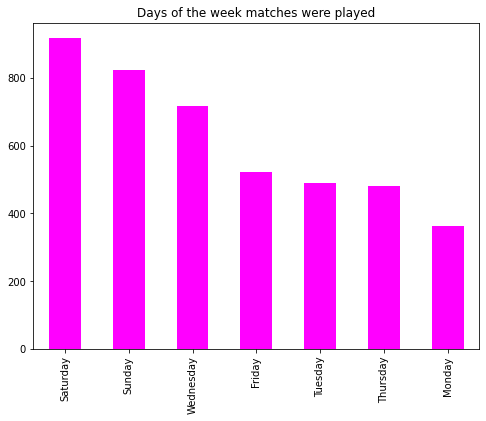

In [15]:
# visualize days matches were played
df_results['Match_day'].value_counts().plot(kind='bar', figsize=(8,6), color='magenta', title='Days of the week matches were played')

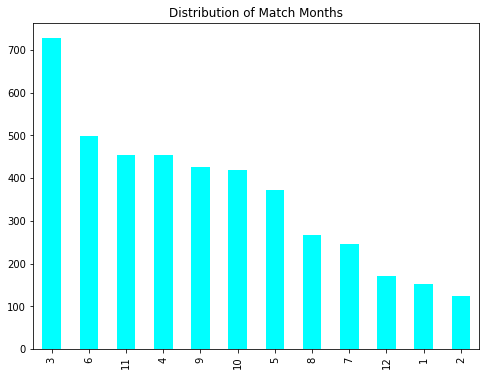

In [16]:
df_results['Match_month'].value_counts().plot(kind='bar', figsize=(8,6), color='cyan', title='Distribution of Match Months')

From the above visualizations, most matches were played in March and on weekends.

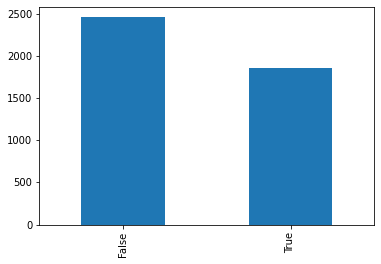

In [17]:
df_results['neutral'].value_counts().plot(kind='bar')

More games were played on non-neutral ground

In [18]:
number=[]
for x in df_results['Match_year'].unique():
    number.append(df_results[df_results['Match_year']==x]['tournament'].nunique())

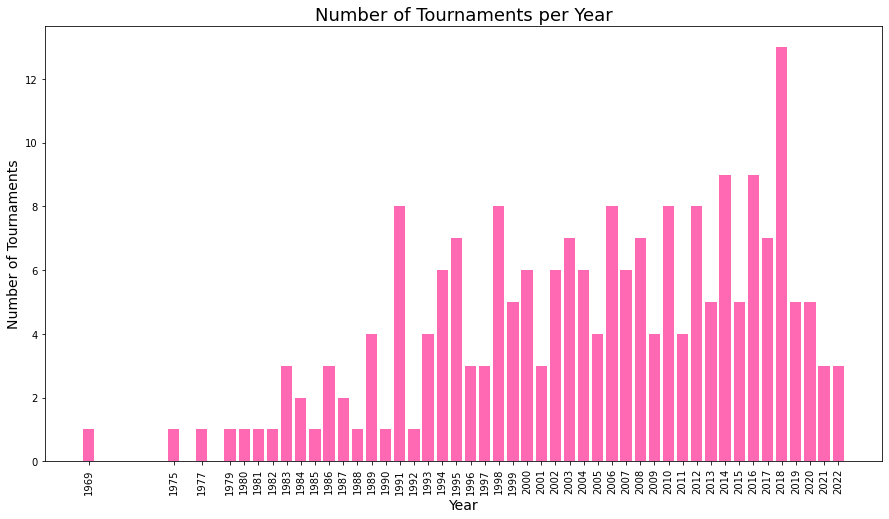

In [19]:
plt.figure(figsize=(15,8))
plt.bar(x=df_results['Match_year'].unique(), height=number, color='hotpink')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tournaments', fontsize=14)
plt.xticks(ticks=df_results['Match_year'].unique(), rotation=90)
plt.title('Number of Tournaments per Year', fontsize=18)
plt.show()

In [20]:
tournaments=[]
for x in df_results['tournament'].unique():
    tournaments.append(df_results[df_results['tournament']==x]['Match_year'].nunique())

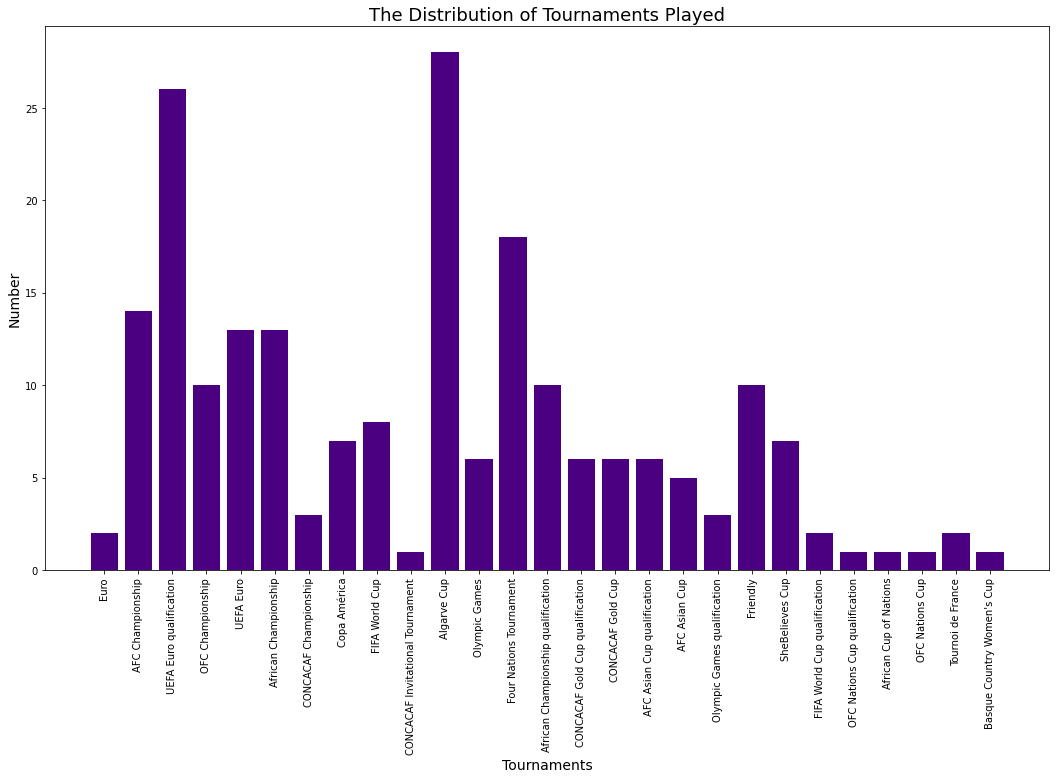

In [21]:
plt.figure(figsize=(18,10))
plt.bar(x=df_results['tournament'].unique(), height=tournaments, color='indigo')
plt.xticks(rotation=90)
plt.title('The Distribution of Tournaments Played', fontsize=18)
plt.xlabel('Tournaments', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.show()

Let check for any form of home advantage by comparing the Top 10 Teams with Highest Home Scores and matches hosted by home team (i.e Countries that hosted Non-neutral Matches). Home advantage is the perceived ease of players playing in their homeland and thereby having more cheerers in the Stadium while the match is played. 

In [22]:
# Getting top 10 teams at home ground
home_data = df_results.groupby('home_team')['home_score'].sum().sort_values(ascending=False).head(10)

In [23]:
# Top 10 teams at away ground
away_data = df_results.groupby('away_team')['away_score'].sum().sort_values(ascending=False).head(10)

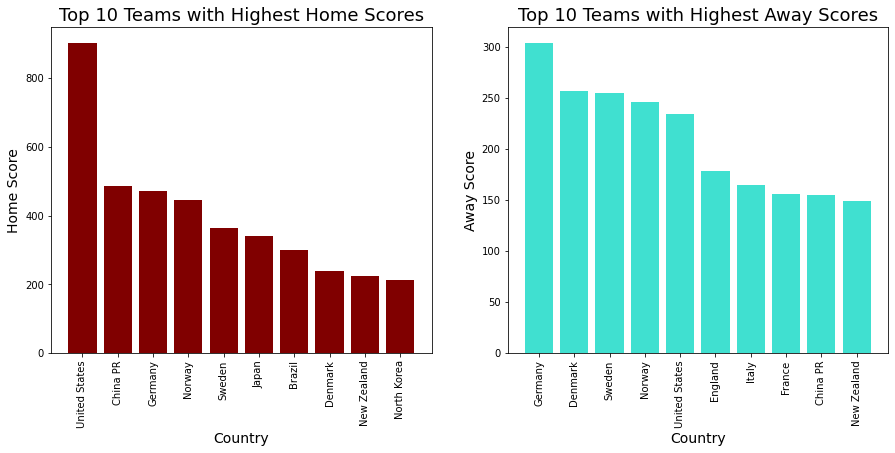

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.bar(x=list(home_data.index), height=list(home_data.values), color='maroon')
plt.xticks(rotation=90)
plt.xlabel('Country',  fontsize=14)
plt.ylabel('Home Score',  fontsize=14)
plt.title('Top 10 Teams with Highest Home Scores', fontsize=18)
plt.subplot(1,2,2)
plt.bar(x=list(away_data.index), height=list(away_data.values), color='turquoise')
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Away Score',  fontsize=14)
plt.title('Top 10 Teams with Highest Away Scores', fontsize=18)
plt.show()

In [25]:
nonneutral_host=[]
for x in df_results['country'].unique():
        df_con=df_results[df_results['country']==x]
        nonneutral_host.append(df_con[(df_con['home_team']==x) | (df_con['away_team']==x)]['date'].count())

In [26]:
df_nonneutral = pd.DataFrame({'Host Country':df_results['country'].unique(),
                           'Number of non-neutral Hosting':nonneutral_host}).sort_values(by='Number of non-neutral Hosting',
                                                                                         ascending=False).head(20)

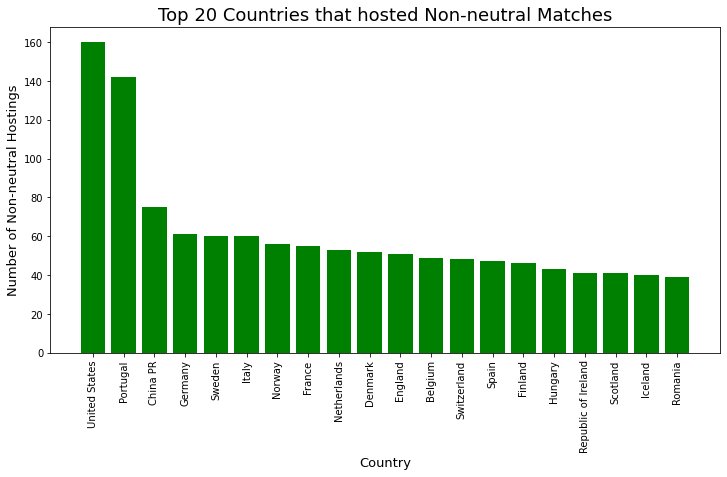

In [27]:
plt.figure(figsize=(12,6))
plt.bar(x=df_nonneutral['Host Country'], height=df_nonneutral['Number of non-neutral Hosting'], color='green')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Non-neutral Hostings', fontsize=13)
plt.xticks(rotation=90)
plt.title('Top 20 Countries that hosted Non-neutral Matches', fontsize=18)
plt.show()

It appears that mostly the United States; then other countries like: China PR, Germany, Sweden and Denmark may be enjoying some sort of home advantage. 

**Let's also visualize the top 20 neutral match host countries and overall host Countries**

In [28]:
neutral_host=[]
for x in df_results['country'].unique():
        df_con=df_results[df_results['country']==x]
        neutral_host.append(df_con[(df_con['home_team']!=x) & (df_con['away_team']!=x)]['date'].count())

In [29]:
df_neutral = pd.DataFrame({'Host Country':df_results['country'].unique(),
                           'Number of neutral Hosting':neutral_host}).sort_values(by='Number of neutral Hosting', ascending=False).head(20)

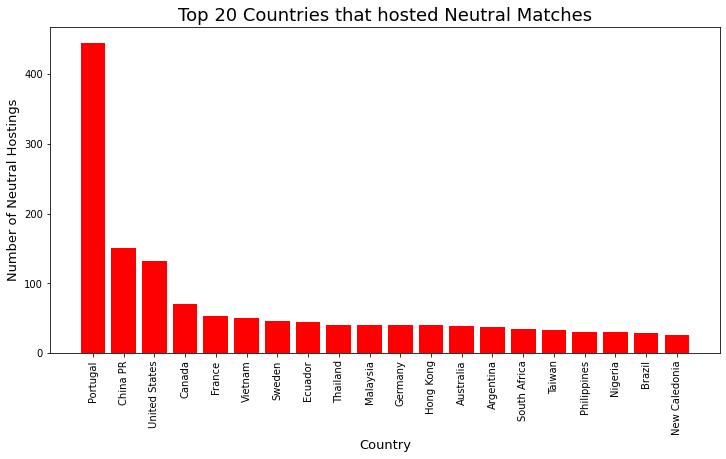

In [30]:
plt.figure(figsize=(12,6))
plt.bar(x=df_neutral['Host Country'], height=df_neutral['Number of neutral Hosting'], color='red')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Neutral Hostings', fontsize=13)
plt.xticks(rotation=90)
plt.title('Top 20 Countries that hosted Neutral Matches', fontsize=18)
plt.show()

In [31]:
# overall top hosting countries
overall_hosts=[]
for x in df_results['country'].unique():
    overall_hosts.append(df_results[df_results['country']==x]['Match_year'].nunique())

df_host=pd.DataFrame({'Host Country':df_results['country'].unique(),
                      'Number of Hosting':overall_hosts}).sort_values(by='Number of Hosting', ascending=False).head(10)

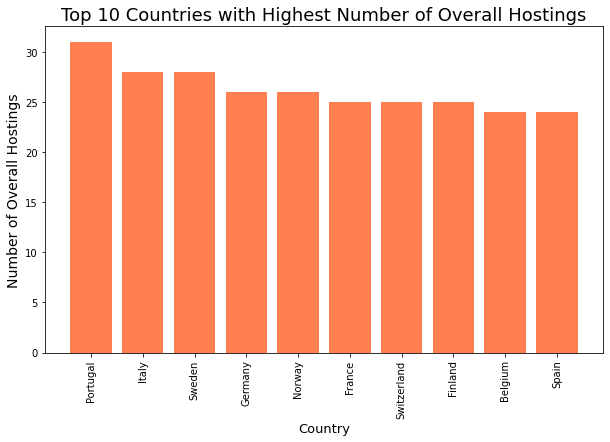

In [32]:
plt.figure(figsize=(10,6))
plt.bar(x=df_host['Host Country'], height=df_host['Number of Hosting'], color='coral')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Overall Hostings', fontsize=14)
plt.xticks(rotation=90)
plt.title('Top 10 Countries with Highest Number of Overall Hostings', fontsize=18)
plt.show()

Portugal was the highest overall host and also the highest host of neutral games played. 

**Overall top 10 performing Teams in Matches played**

In [33]:
df_home_away = pd.DataFrame({'total_home_scores':home_data ,'total_away_scores':away_data})

In [34]:
df_home_away.isna().sum()

total_home_scores    3
total_away_scores    3
dtype: int64

In [35]:
df_home_away.fillna(0, inplace=True)

In [36]:
df_home_away['total_scores'] = df_home_away['total_home_scores'] + df_home_away['total_away_scores']

In [37]:
df_home_away_sorted = df_home_away.sort_values(by='total_scores', ascending=False).head(10)

In [38]:
df_home_away_sorted

,total_home_scores,total_away_scores,total_scores
United States,903.0,234.0,1137.0
Germany,471.0,304.0,775.0
Norway,446.0,246.0,692.0
China PR,487.0,155.0,642.0
Sweden,365.0,255.0,620.0
Denmark,239.0,257.0,496.0
New Zealand,223.0,149.0,372.0
Japan,340.0,0.0,340.0
Brazil,299.0,0.0,299.0
North Korea,214.0,0.0,214.0


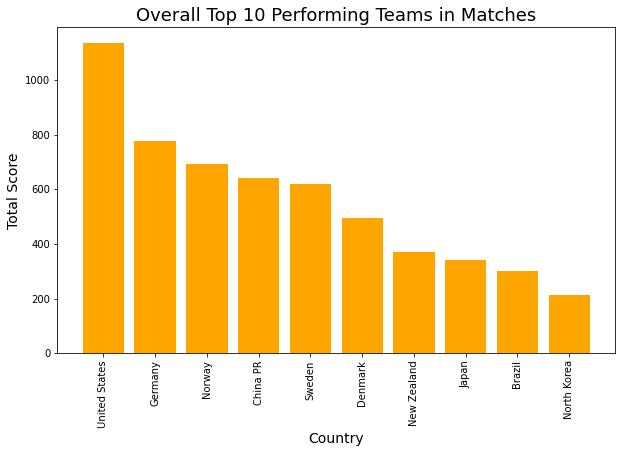

In [39]:
plt.figure(figsize=(10,6))
plt.bar(x=list(df_home_away_sorted.index), height=df_home_away_sorted['total_scores'], color='orange')
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.title('Overall Top 10 Performing Teams in Matches', fontsize=18)
plt.show()

Most top performing countries enjoyed home advantage. Home advantage might be a thing in the game of Football.

**Check for the ratio of home wins and loss by overall top 10 Host Countries**

In [40]:
home_win=[]
home_lose=[]
home_draw=[]
for x in df_results['country'].unique():
    df_con=df_results[df_results['country']==x]
    df_home=df_con[df_con['home_team']==x]
    home_win.append(df_con[df_con['home_score']>df_con['away_score']]['date'].count())
    home_lose.append(df_con[df_con['home_score']<df_con['away_score']]['date'].count())
    home_draw.append(df_con[df_con['home_score']==df_con['away_score']]['date'].count())

In [41]:
df_game = pd.DataFrame({'Host Country':df_results['country'].unique(),
                      'Number of Wins':home_win, 'Number of Losses':home_lose, 'Number of Draw':home_draw})

In [42]:
df_game.head()

,Host Country,Number of Wins,Number of Losses,Number of Draw
0,Italy,53,10,13
1,Hong Kong,41,13,3
2,Taiwan,32,11,0
3,India,13,4,2
4,Finland,26,27,14


In [43]:
df_combined = pd.merge(df_game, df_host, on='Host Country').sort_values(by='Number of Hosting', ascending=False)

In [44]:
df_combined.head()

,Host Country,Number of Wins,Number of Losses,Number of Draw,Number of Hosting
7,Portugal,271,227,89,31
0,Italy,53,10,13,28
4,Sweden,63,22,21,28
2,Norway,47,7,9,26
8,Germany,70,15,16,26


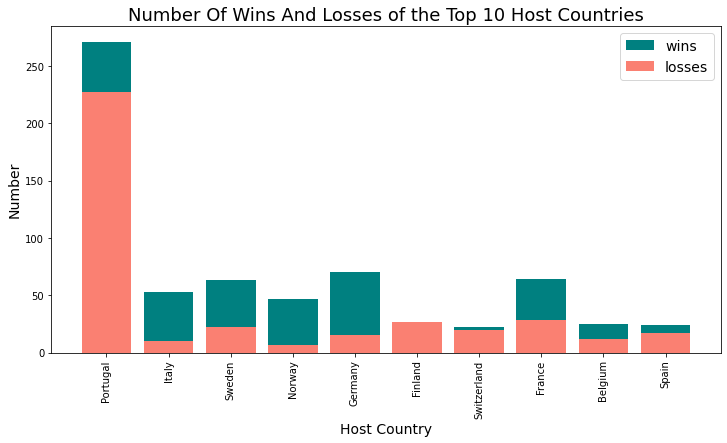

In [45]:
plt.figure(figsize=(12,6))
plt.bar(x=df_combined['Host Country'], height=df_combined['Number of Wins'], color='teal')
plt.bar(x=df_combined['Host Country'], height=df_combined['Number of Losses'], color='salmon')
plt.xlabel('Host Country', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.xticks(rotation=90)
plt.legend(['wins', 'losses'], fontsize=14)
plt.title('Number Of Wins And Losses of the Top 10 Host Countries', fontsize=18)
plt.show()

**Let's see the winners of the shootouts**

In [46]:
winners=[]
for x in df_shootouts['winner'].unique():
    winners.append(df_shootouts[df_shootouts['winner']==x]['Match_year'].nunique())

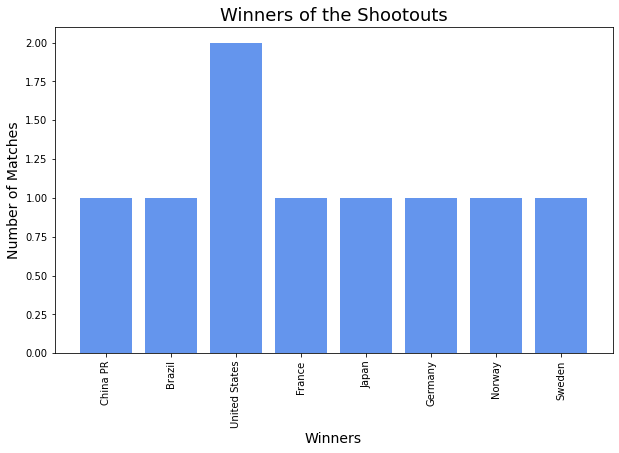

In [47]:
plt.figure(figsize=(10,6))
plt.bar(x=df_shootouts['winner'].unique(), height=winners, color='cornflowerblue')
plt.xticks(rotation=90)
plt.xlabel('Winners', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.title('Winners of the Shootouts', fontsize=18)
plt.show()

**The United States was not only the most outstanding in matches; but also won most of the shootouts**

Let's check for draws of matches in the result dataset that were resolved in the shootout dataset by using their dates to match the rows of the results.

In [48]:
np.where(df_results.date.eq(df_shootouts.date))==True

False

**Therefore, the shootouts dataset have no connection with the results dataset and should not be used further.**

### **Feature Engineering/Model Building**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [50]:
# creating the target variable
df_results['verdict'] = np.where(df_results['home_score']>df_results['away_score'],1,0)

In [51]:
# encoding the neutral column
df_results['neutral'] = np.where(df_results['neutral']==True, 1,0)

In [52]:
# encoding other categorical variables
df_encoded = pd.get_dummies(data=df_results[['home_team','away_team','tournament']], prefix=['ht','at','tmt'], drop_first=True)
df_encoded.head()

,ht_Algeria,ht_American Samoa,ht_Andorra,ht_Angola,ht_Anguilla,ht_Antigua and Barbuda,ht_Argentina,ht_Armenia,ht_Aruba,ht_Australia,...,tmt_Friendly,tmt_OFC Championship,tmt_OFC Nations Cup,tmt_OFC Nations Cup qualification,tmt_Olympic Games,tmt_Olympic Games qualification,tmt_SheBelieves Cup,tmt_Tournoi de France,tmt_UEFA Euro,tmt_UEFA Euro qualification
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_useful = df_results[['neutral','verdict']]
df_useful.head()

,neutral,verdict
0,0,1
1,1,1
2,1,1
3,0,1
4,1,1


In [54]:
df = pd.concat([df_encoded, df_useful], axis=1)

In [55]:
df.shape

(4314, 398)

In [56]:
df.isna().sum()

ht_Algeria                     0
ht_American Samoa              0
ht_Andorra                     0
ht_Angola                      0
ht_Anguilla                    0
                              ..
tmt_Tournoi de France          0
tmt_UEFA Euro                  0
tmt_UEFA Euro qualification    0
neutral                        0
verdict                        0
Length: 398, dtype: int64

In [57]:
X = df.drop(['verdict'], axis=1)
y = df['verdict']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=24)

In [59]:
ytrain_count = Counter(y_train)
print(f'Target distribution of y_train: {ytrain_count}')

Target distribution of y_train: Counter({1: 1835, 0: 1616})


The dataset will be trained using the following machine learning algorithms: Random Forest Classifier, Decision Tree Classifier, Extreme Gradient Boosting Classifier, Logistic Regression and Support Vector Classifier. The StratifiedKFold CV is used to further split the train data into train and validation sets in order to choose the appropriate model.

In [60]:
rfc = RandomForestClassifier(random_state=24)
rfc.fit(x_train, y_train)
prob_rfc = rfc.predict_proba(x_test)[:, 1]

In [61]:
skfold =  StratifiedKFold(n_splits=10, shuffle=True, random_state=24)
rfc_scores = cross_val_score(rfc, x_train, y_train, cv=skfold, scoring='accuracy')
print("StratifiedKfold CV average score (Random Forest): %.3f" % rfc_scores.mean(),  rfc_scores.std())

StratifiedKfold CV average score (Random Forest): 0.700 0.016754541341819213


In [62]:
dtr = DecisionTreeClassifier(random_state=24)
dtr.fit(x_train, y_train)
prob_dtr = dtr.predict_proba(x_test)[:, 1]

In [63]:
dtr_scores = cross_val_score(dtr, x_train, y_train, cv=skfold, scoring='accuracy')
print("Stratified Kfold CV average score (Decision Tree): %.3f" % dtr_scores.mean(),  dtr_scores.std())

Stratified Kfold CV average score (Decision Tree): 0.700 0.02839420535649747


In [64]:
xgbc = XGBClassifier(random_state=24, tree_method='gpu_hist', gpu_id=0)
xgbc.fit(x_train, y_train)
prob_xgbc = xgbc.predict_proba(x_test)[:, 1]

In [65]:
# use mean and std to check how the model performed across different sets
xgbc_scores = cross_val_score(xgbc, x_train, y_train, cv=skfold, scoring='accuracy')
print("Stratified Kfold CV average score (XGBoost): %.3f" % xgbc_scores.mean(),  xgbc_scores.std())

Stratified Kfold CV average score (XGBoost): 0.661 0.01909753233478143


In [66]:
lgr = LogisticRegression(random_state=24)
lgr.fit(x_train, y_train)
prob_lgr = lgr.predict_proba(x_test)[:, 1]

In [67]:
lgr_scores = cross_val_score(lgr, x_train, y_train, cv=skfold, scoring='accuracy')
print("StratifiedKfold CV average score (Logistic Regression): %.3f" % lgr_scores.mean(), lgr_scores.std())

StratifiedKfold CV average score (Logistic Regression): 0.749 0.015607206866640676


In [68]:
svc = SVC(kernel = 'poly', random_state=24, probability=True)
svc.fit(x_train, y_train)
prob_svc = svc.predict_proba(x_test)[:, 1]

In [69]:
svc_scores = cross_val_score(svc, x_train, y_train, cv=skfold, scoring='accuracy')
print("Stratified Kfold CV average score (Support Vector): %.3f" % svc_scores.mean(), svc_scores.std())

Stratified Kfold CV average score (Support Vector): 0.711 0.020709033931312768


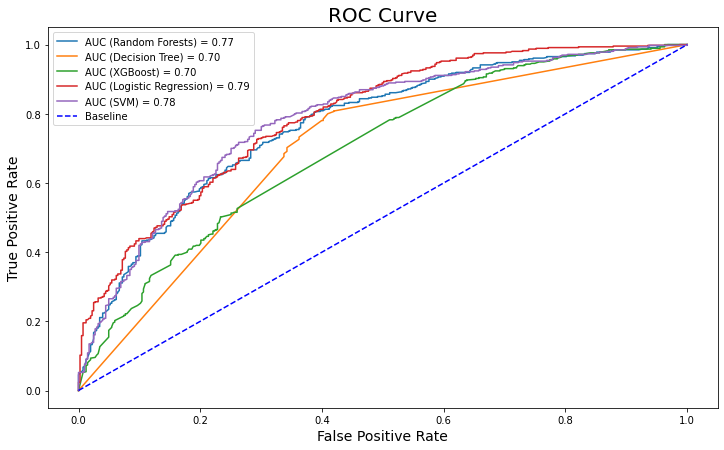

In [70]:
auc_lgr = roc_auc_score(y_test, prob_lgr)
fpr_lgr, tpr_lgr, thresholds_lgr = roc_curve(y_test, prob_lgr)

auc_dtr = roc_auc_score(y_test, prob_dtr)
fpr_dtr, tpr_dtr, thresholds_dtr = roc_curve(y_test, prob_dtr)

auc_rfc = roc_auc_score(y_test, prob_rfc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, prob_rfc)

auc_xgbc = roc_auc_score(y_test, prob_xgbc)
fpr_xgbc, tpr_xgbc, thresholds_xg = roc_curve(y_test, prob_xgbc)

auc_svc = roc_auc_score(y_test, prob_svc)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, prob_svc)

plt.figure(figsize=(12, 7))
plt.plot(fpr_rfc, tpr_rfc, label=f'AUC (Random Forests) = {auc_rfc:.2f}')
plt.plot(fpr_dtr, tpr_dtr, label=f'AUC (Decision Tree) = {auc_dtr:.2f}')
plt.plot(fpr_xgbc, tpr_xgbc, label=f'AUC (XGBoost) = {auc_xgbc:.2f}')
plt.plot(fpr_lgr, tpr_lgr, label=f'AUC (Logistic Regression) = {auc_lgr:.2f}')
plt.plot(fpr_svc, tpr_svc, label=f'AUC (SVM) = {auc_svc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

### **Model Selection/Optimization**

The chosen model is Logistic Regression because it has the highest AUC and CV score

In [71]:
params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

lgr_opt = GridSearchCV(estimator=lgr, param_grid=params, n_jobs=-1, cv=skfold, scoring='accuracy')

In [72]:
lgr_opt.fit(x_train, y_train)
y_pred = lgr_opt.predict(x_test)

In [73]:
lgr_opt.best_params_, lgr_opt.best_score_

({'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}, 0.7568861522995729)

### **Model Evaluation**

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Optimal model (Logistic Regression): %.2f%%" % (accuracy * 100))

Accuracy of Optimal value: 72.54%


In [75]:
confusion_matrix(y_test, y_pred)

array([[265, 138],
       [ 99, 361]])

In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(265, 138, 99, 361)

In [77]:
roc_auc_score(y_test, y_pred)

0.7211754234545258